In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat


In [10]:

# select random points
def init_centroids(X, k):
   m, n = X.shape
   centroids = np.zeros((k, n))
   idx = np.random.randint(0, m, k)  #
   
   for i in range(k):
       centroids[i,:] = X[idx[i],:]
   
   return centroids


# 3centroid function // selection
def find_closest_centroids(X, centroids):
   m = X.shape[0]
   k = centroids.shape[0]
   idx = np.zeros(m)
   
   
   for i in range(m):
       min_dist = 1000000
       for j in range(k):
           dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
           if dist < min_dist:
               min_dist = dist
               idx[i] = j
   
   return idx

# centroid maker
def compute_centroids(X, idx, k):
   m, n = X.shape
   centroids = np.zeros((k, n))
   
   for i in range(k): #k == o /1 /2 
       indices = np.where(idx == i)
       centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
   
   return centroids

# k means function
def run_k_means(X, initial_centroids,max_iters):
   m, n = X.shape
   k = initial_centroids.shape[0]
   idx = np.zeros(m)
   centroids = initial_centroids
   
   for i in range(max_iters):
       idx = find_closest_centroids(X, centroids) # selection 
       centroids = compute_centroids(X, idx, k)   
   
   return idx, centroids




def pca(X):
   # normalize the features
   X = (X - X.mean()) / X.std()
   
   # compute the covariance matrix
   X = np.matrix(X)
   cov = (X.T * X) / X.shape[0]
#    print('cov \n', cov)
#    print()
   # perform SVD
   U, S, V = np.linalg.svd(cov) # singular value decomposition
   
   return U, S, V

def project_data(X, U, k):
   U_reduced = U[:,:k]
   return np.dot(X, U_reduced)



def recover_data(Z, U, k):
   U_reduced = U[:,:k]
   return np.dot(Z, U_reduced.T)


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012', '__version__': '1.0', '__globals__': [], 'A': array([[[219, 180, 103],
        [230, 185, 116],
        [226, 186, 110],
        ...,
        [ 14,  15,  13],
        [ 13,  15,  12],
        [ 12,  14,  12]],

       [[230, 193, 119],
        [224, 192, 120],
        [226, 192, 124],
        ...,
        [ 16,  16,  13],
        [ 14,  15,  10],
        [ 11,  14,   9]],

       [[228, 191, 123],
        [228, 191, 121],
        [220, 185, 118],
        ...,
        [ 14,  16,  13],
        [ 13,  13,  11],
        [ 11,  15,  10]],

       ...,

       [[ 15,  18,  16],
        [ 18,  21,  18],
        [ 18,  19,  16],
        ...,
        [ 81,  45,  45],
        [ 70,  43,  35],
        [ 72,  51,  43]],

       [[ 16,  17,  17],
        [ 17,  18,  19],
        [ 20,  19,  20],
        ...,
        [ 80,  38,  40],
        [ 68,  39,  40],
        [ 59,  43,  42]],

       [[ 15,  19,  

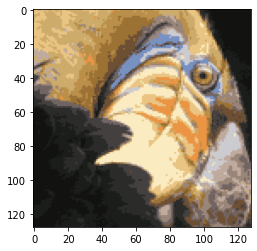

In [12]:
# we need to compress the image   
image_data = loadmat('C:\\Users\\Samira Dihadril\\2-Machine_Learning\\UnSupervisedLearning\\bird_small.mat')

print(image_data)

A = image_data['A']
print(A.shape)
plt.imshow(A)

# normalize value ranges
A = A / 255.

# reshape the array to matrix with 1 dim 
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
print(X.shape)
plt.imshow(A)

# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)
print(initial_centroids)


# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]

# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))

plt.imshow(X_recovered)
